In [2]:
import track
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Vanilla = SGD with momentum.
# LRD = learning rate dropout using original masking code (use uniform cdf)
# Bernoulli = use torch bernoulli code from the official paper implementation
# Official = using official optimizer class

proj = track.Project("./remote_logs/logs", None)  # None = remote url
vanilla_ids = proj.ids[proj.ids['lr_dropout_rate'] == 1.0]['trial_id']
lrd_ids = proj.ids[proj.ids['lr_dropout_rate'] == 0.5]['trial_id']

vanilla = proj.results(vanilla_ids)
lrd = proj.results(lrd_ids)

# Using paper masking
bernoulli_proj = track.Project("./remote_bernoulli_logs/bernoulli_logs/bernoulli_tests", None)
bernoulli_ids = bernoulli_proj.ids['trial_id']
bernoulli = bernoulli_proj.results(bernoulli_ids)

# Using optimizer from paper code
official_proj = track.Project("./remote_official_logs/official_logs/official_tests", None)
official_ids = official_proj.ids['trial_id']
official = official_proj.results(official_ds)

In [6]:
### Average accuracy over all seeds
def seed_avg(df, col, ids):
    #return df[df['trial_id'].isin(ids)].groupby(['trial_id'])[col].mean()
    return df.groupby(['iteration']).mean()[col]

vanilla_test_accs = seed_avg(vanilla, 'test_acc', vanilla_ids)
vanilla_train_accs = seed_avg(vanilla, 'train_acc', vanilla_ids)
lrd_test_accs = seed_avg(lrd, 'test_acc', lrd_ids)
lrd_train_accs = seed_avg(lrd, 'train_acc', lrd_ids)

bernoulli_test_accs = seed_avg(lrd, 'test_acc', bernoulli_ids)
bernoulli_train_accs = seed_avg(lrd, 'train_acc', bernoulli_ids)

official_test_accs = seed_avg(lrd, 'test_acc', official_ids)
official_train_accs = seed_avg(lrd, 'train_acc', official_ids)

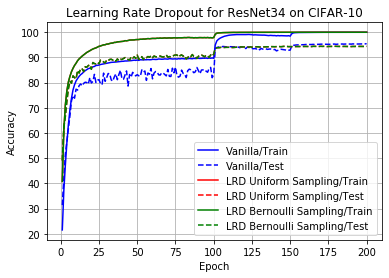

In [7]:
### Plotting
x = list(range(1, 201))

markersize = 12

## vanilla
plt.plot(x, vanilla_train_accs, label='Vanilla/Train', color='b', markersize=markersize)
plt.plot(x, vanilla_test_accs, label='Vanilla/Test', color='b', linestyle='dashed', markersize=markersize)
## learning rate dropout
plt.plot(x, lrd_train_accs, label='LRD Uniform Sampling/Train', color='r', markersize=markersize)
plt.plot(x, lrd_test_accs, label='LRD Uniform Sampling/Test', color='r', linestyle='dashed', markersize=markersize)
# paper sampling code
plt.plot(x, bernoulli_train_accs, label='LRD Bernoulli Sampling/Train', color='g', markersize=markersize)
plt.plot(x, bernoulli_test_accs, label='LRD Bernoulli Sampling/Test', color='g', linestyle='dashed', markersize=markersize)

# using the optimizer from the official repo
plt.plot(x, official_train_accs, label='Official LRD Implementation/Train', color='g', markersize=markersize)
plt.plot(x, official_test_accs, label='Official LRD Implementation/Test', color='g', linestyle='dashed', markersize=markersize)

# plt
plt.title('Learning Rate Dropout for ResNet34 on CIFAR-10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

In [9]:
print("Vanilla test max acc: %.4f" % vanilla_test_accs.max())
print("LRD (uniform sampling) test max acc: %.4f" % lrd_test_accs.max())
print("LRD (torch bernoulli sampling) test max acc: %.4f" % bernoulli_test_accs.max())
print("Official LRD implementation test max acc: %.4f" % official_test_accs.max())

Vanilla test max acc: 95.4500
LRD (uniform sampling) test max acc: 94.4250
LRD (torch bernoulli sampling) test max acc: 94.4250
